In [22]:
import pandas as pd 
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder 
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import cross_val_score

In [2]:
df = pd.read_csv(".\data\practive pyspark.csv")
df.drop(columns ={'flight_date','booking_date','Code'}, inplace =True)
df.head()

,area,gender,age,age_group,year_of_school,degree,job,know_english,know_france,know_chinese,income,flight_status,professionally_staff,customer_service,diversity_product,good_price,easily_transaction,goodlooking_staff,diversity_flighttime,good_construction
0,central,female,69,middle,16,master,manager,1,1,1,33250,1,2,2,1,1,2,2,1,1
1,southern,female,50,middle,12,highshool,officer,0,0,0,6960,1,3,3,3,2,3,3,2,3
2,northern,male,73,elder,12,highshool,officer,1,0,0,11100,1,2,2,1,2,3,5,1,1
3,northern,female,73,elder,12,highshool,officer,0,0,0,11100,1,5,3,2,4,5,3,2,2
4,central,male,69,middle,16,master,officer,1,0,0,16140,0,3,3,3,3,3,3,3,3


In [3]:
# logarit biến income
df['income'] = np.log(df['income'] )

In [4]:
#Check missing values
df.isna().sum()

area                    0
gender                  0
age                     0
age_group               0
year_of_school          0
degree                  0
job                     0
know_english            0
know_france             0
know_chinese            0
income                  0
flight_status           0
professionally_staff    0
customer_service        0
diversity_product       0
good_price              0
easily_transaction      0
goodlooking_staff       0
diversity_flighttime    0
good_construction       0
dtype: int64

In [5]:
X = df[['area', 'gender', 'age', 'age_group', 'year_of_school', 'degree', 'job',
       'know_english', 'know_france', 'know_chinese'
       ]]
y = df['income']

In [26]:
#Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state =4 )

In [7]:
ohe = OneHotEncoder()
imp_ohe = make_pipeline(ohe)

# Making a transformer
ct = make_column_transformer(
    (imp_ohe, ['area', 'gender','age_group','degree','job']),
    remainder='passthrough')

In [8]:
logreg = LinearRegression()

In [9]:
pipe = make_pipeline(ct,logreg )

In [20]:
# Fit data using the pipeline
pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('pipeline',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder())]),
                                                  ['area', 'gender',
                                                   'age_group', 'degree',
                                                   'job'])])),
                ('linearregression', LinearRegression())])

In [11]:
#predict income
y_pred = pipe.predict(X_test)
y_pred;

In [12]:
e = pd.DataFrame({'y_true': y_test, 'y_pridict': y_pred})
e.head()

,y_true,y_pridict
66,9.163249,9.262221
152,9.028818,9.033287
123,9.372459,9.269107
285,10.126631,10.198592
70,9.325453,9.301528


Ta có thấy model đưa ra kết quà khá là tốt với sai số nhỏ

In [13]:
print(f"Hiệu suất của mô hình R bình phương: {r2_score(y_test, y_pred)}")

Hiệu suất của mô hình R bình phương: 0.8677036853105986


 Vậy 86.67 % sự thay đổi của biến dependent có thể được giải thích bằng các biến independent

Mean Square error

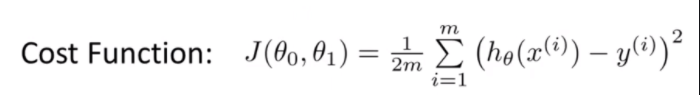

In [15]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred)

0.022986362986716004

Ta có thể thấy tổng bình phương sai số giữa giá trị quan sát và giá trị dự đoán là rất nhỏ ~ 0, các giá trị dự đoán gần khớp với giá trị mong đợi. Vậy model của ta là model tốt

In [27]:
from sklearn.metrics import max_error
max_error(y_test, y_pred)

0.5609906103422677

Model cho ra giá trị sai số tối đa là 0.56. Khá tốt!